# Data Extraction

In [ ]:
# {
#   "reviewerID": "A2SUAM1J3GNN3B",
#   "asin": "0000013714",
#   "reviewerName": "J. McDonald",
#   "helpful": [2, 3],
#   "reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",
#   "overall": 5.0,
#   "summary": "Heavenly Highway Hymns",
#   "unixReviewTime": 1252800000,
#   "reviewTime": "09 13, 2009"
# }

## Read raw data

In [1]:
# import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

# p =10000
# def getDF(path):
#     i = 0
#     df = {}
#     for d in parse(path):
#         df[i] = d
#         i += 1
#         if i%p == 0:
#             print(i,'th row: ', d)
        
#     return pd.DataFrame.from_dict(df, orient='index')

In [2]:
# read data
org_data = parse('../../data/item_dedup.json.gz')

# length distribution check
len_text, len_summary =[],[]
for d in org_data:
    len_text.append(len(d['reviewText'].split()))
    len_summary.append(len(d['summary'].split()))  
    
# import pickle 
# pickle.dump(len_text, open('len_text.pkl', 'wb'))
# pickle.dump(len_summary, open('len_summary.pkl', 'wb'))

In [1]:
# import pickle 
# len_text = pickle.load(open('len_text.pkl','rb'))
# len_summary = pickle.load(open('len_summary.pkl','rb'))

In [2]:
import pandas as pd

len_df = pd.DataFrame()
len_df['len_text'] = len_text
len_df['len_summary'] = len_summary

## Length of reviewtext

In [3]:
# length of review text 
len_df.len_text.describe()

,0
count,8.267714e+07
mean,8.484165e+01
std,1.187143e+02
min,0.000000e+00
25%,2.600000e+01
50%,4.500000e+01
75%,9.300000e+01
max,7.025000e+03


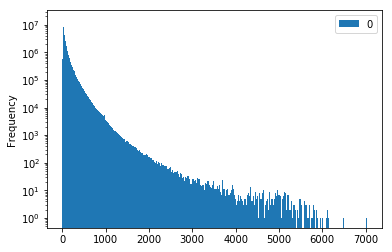

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

len_df.len_text.plot.hist(bins=1000)
plt.yscale('log')
plt.show()

[ 2343291 23306669 10918949  7524743  5704455  4537554  3661776  3005091
  2501605 11748605  6211290  1069422   130711     9595     2949      433]


Text(0.5, 0, 'Review text length')

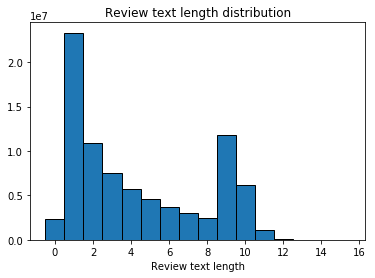

In [18]:
import numpy as np
fig = plt.figure()

bins = [0,20,30,40,50,60,70,80,90,100,200,500,1000,2000,3000,5000,7000]
hist,bins = np.histogram(len_df.len_text, bins=bins)
print(hist)

plt.bar(range(len(bins)-1),hist, width=1, edgecolor='k')
plt.title('Review text length distribution')
plt.xlabel('Review text length')
# plt.ylabel('y')

## Length of summary

In [3]:
# length of summary
len_df.len_summary.describe()

count    8.267714e+07
mean     4.064715e+00
std      2.807172e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      5.800000e+01
Name: len_summary, dtype: float64

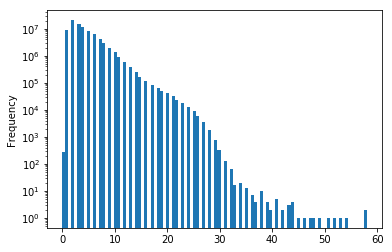

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

len_df.len_summary.plot.hist(bins=100)
plt.yscale('log')
plt.show()

In [13]:
import numpy as np
fig = plt.figure()

bins = [0,2,5,8,10,12,15,18,20,25,30,35,40,50,60]
hist,bins = np.histogram(len_df.len_summary, bins=bins)
print(hist)
# plt.bar(range(len(bins)-1),hist, width=1, edgecolor='k')
# plt.title('Review summary length distribution')
# plt.xlabel('Review summary length')

[ 8992765 46241975 18535359  4815326  2267175  1198742   364451   111255
   128463    21008      555       38       21        6]


<Figure size 432x288 with 0 Axes>

In [101]:
df

{0: {'asin': '0000013714',
  'helpful': [0, 0],
  'overall': 4.0,
  'reviewText': 'Heavenly Highway HymnsI ordered this hymnal because I learned to read shaped note music when I was a teenager. I play piano but do not sing. I am 85 years old. This hymnal has mostof the songs I have learned over the years. It was exactly what I wanted and needed.It was in good condition and the price was right. I purchased this book from Amazon.',
  'reviewTime': '10 16, 2012',
  'reviewerID': 'A3BED5QFJWK88M',
  'reviewerName': 'jimedd',
  'summary': 'Heavenly Highway Hymns',
  'unixReviewTime': 1350345600},
 1: {'asin': '0000013714',
  'helpful': [2, 3],
  'overall': 5.0,
  'reviewText': 'I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!',
  'reviewTime': '09 13, 2009',
  'reviewerID': 'A2SUAM1J3GNN3B',
  '

In [69]:
print(data.reviewText[0])
print('summary:', data.summary[0])
data[['asin','reviewText','summary']]

You may laugh, but I have found that Otherland volumes 1-4 are poor at picking up debris around the house.  I once spilled some cornflakes on the floor, and foolishly thought that I could clean it up by dropping &#34;City of Golden Shadows&#34; on it.  Not only did it not clean, it managed to make things worse by fragmenting the cornflakes into smaller and smaller pieces.  I did what any normal person would do: I stacked the other books on top, hoping that the combined power would whisk the cornflakes away to the technological wonderland that is Otherland.  No such results.Bin Otherland Empty, on the other hand, works like magic.  If you hook it up to a powerful enough motor, you can banish those cornflakes to the land of wind and ghosts.  The downside is that it's pretty light reading, but given the young adult trend these days it's following the light reading trend that literature is headed for these days.It's recommended that you get through the previous volume though (&#34;Hoover E

,asin,reviewText,summary
0,0000029831,"You may laugh, but I have found that Otherland...",The superior cleanser
1,0000029831,Do not try and vacuum the dust. That's impossi...,Very deep and thought provoking.
2,0000029831,What if Dread had come out victorious and left...,WHAT IF....?


In [29]:
# print(len(data.summary[0].split()))
# data.summary[0].split()

5


['Listing', 'is', 'all', 'screwed', 'up']

In [ ]:
# ['reviewerID': 'A10TK8OL2NJ1FU', 'asin': '0380797178', 'reviewerName': 'Jasmine', 'helpful': [4, 5], 'reviewText': "Well, Poppy and Erith are going to tell Ragweed's parents that he died, so on their way they meet Rye, who just so happens to be Ragweed's brother he is out seasrching for Ragweed, and then they break the news to him that Ragweed died, which actually might be a not so bad thing, because for Rye being second best in his family was a way of life they liked Ragweed better, but now would be a perfect chance for Rye to prove himself, I could tell you what happens, but you'll just have to read the book!.............!", 'overall': 5.0, 'summary': 'ANOTHER ONE!!!', 'unixReviewTime': 1043971200, 'reviewTime': '01 31, 2003']

In [8]:
df = getDF('../data/item_dedup.json.gz')

10000 th row:  {'reviewerID': 'A31058CO8X7LQN', 'asin': '000224053X', 'reviewerName': 'atr1688 "atr1688"', 'helpful': [2, 14], 'reviewText': 'It would take to many time to explain all the reasons why i loved this and the two following books. If you like hard sci-fi its a must read book.', 'overall': 5.0, 'summary': 'Best Science- Fiction ever red', 'unixReviewTime': 1106784000, 'reviewTime': '01 27, 2005'}
20000 th row:  {'reviewerID': 'AYE6KHD4A9CJN', 'asin': '0005019281', 'reviewerName': 'Kevin Barnett "KD Barnett"', 'helpful': [0, 0], 'reviewText': "I first saw this movie as a kid in the late 70's. I never forgot and when i found it on dvd i could not resist. It brought just as much enjoyment now as then. I like the twist on a classic with an American version.", 'overall': 4.0, 'summary': 'The Fonz does Scrooge', 'unixReviewTime': 1261526400, 'reviewTime': '12 23, 2009'}
30000 th row:  {'reviewerID': 'AQ5U1DAQLGKK1', 'asin': '0006550436', 'reviewerName': 'Lily', 'helpful': [0, 0], '

110000 th row:  {'reviewerID': 'A1EOZJW1OPR01', 'asin': '0007447868', 'reviewerName': 'Karen Miller', 'helpful': [22, 33], 'reviewText': "While I absolutely believe that there is no 'right' or 'wrong' response to a book, because it's all just personal opinion, I'm taken aback by some of the hostility I'm seeing here.If you went to see a play, would  you complain the story wasn't finished at the end of the first act? No. There's an interval and then there's a second act, and then there's the end. So okay, this story has more than 2 acts. By the end it will have, maybe, 7. So it's not really fair to say 'these characters aren't important' or 'this was just a bridge' or 'we didn't get to the end' ...  because until we do reach the end, we can't tell.I believe Martin is the single greatest fantasy writer of our time. I think he will go down in history as one of the greatest, full stop. Was I frustrated at the long time between books 3 and 4? You'd better believe it. Am I sorry that some of

230000 th row:  {'reviewerID': 'A28I5ZYRQ58VGD', 'asin': '0060282983', 'reviewerName': 'gwen wall', 'helpful': [0, 0], 'reviewText': 'The world needs to love one another again just as the characters in this story did!  Charlotte teaches us the true meaning of giving and love.', 'overall': 5.0, 'summary': 'A Wonderful Love Story', 'unixReviewTime': 1402444800, 'reviewTime': '06 11, 2014'}
240000 th row:  {'reviewerID': 'AE14CDBIN1KYA', 'asin': '0060392886', 'reviewerName': 'B. M. Ballard "Book Lover"', 'helpful': [0, 0], 'reviewText': 'This book was fantastic I loved the whole thing and read it in about 2 days. I would have liked to hear from Tommy Lee more as I found him to be the funniest and most interesting to read. All in all an awesome book that deserves 5 stars!!', 'overall': 5.0, 'summary': "Rockin' Book", 'unixReviewTime': 1163203200, 'reviewTime': '11 11, 2006'}
250000 th row:  {'reviewerID': 'A1US8UAPHMFBKW', 'asin': '0060509546', 'reviewerName': 'Gayle "brighttyger"', 'helpf

360000 th row:  {'reviewerID': 'A2TX179XAT5GRP', 'asin': '0060739592', 'reviewerName': 'TeensReadToo "Eat. Drink. Read. Be Merrier."', 'helpful': [10, 10], 'reviewText': 'Twelve-year-old Fern McAllister is the black sheep of her family, set apart by pale skin that blisters after moments in the sun and dark black hair in a family of blondes. Her strange sensitivity to light, and seeming ability to communicate with the family dog, are secondary concerns to the kids at her middle school who tease her for having an absent father. Despite gaining herself the nickname "freaky Fern," she leads a generally happy life, thanks to her mother\'s caring and her twinbrother Sam\'s friendship.But one day in the middle of English, Fern simply disappears. No one can find her; no one has seen her leave the room, much less her desk. Unbeknownst to her classmates, Fern has somehow managed to teleport to Pirate Cove, her favorite part of a nearby beach. Frightened and unsure of how she got there, Fern trie

410000 th row:  {'reviewerID': 'A2Q20HP871VSKW', 'asin': '0060820942', 'reviewerName': 'JerseyTomato', 'helpful': [21, 21], 'reviewText': "I cannot say enough wonderful things about this cookbook.  People have mentioned the beautiful photos and yes, they are certainly there.  The writing helps to weave a spell about the recipes.  You are not just making a soup, but the soup her aunt used to make when...The recipes will knock your socks off.  The roasted tomato tart is worth the price of the book.  My book club was blown away by the bluberry tart.  A gluten intolerant guest was thrilled with Gateau Lawrence.  (Flourless chocolate.  Easy, intense, and will make you a legend among your friends).  The soups are excellent too.  Oh yes, and the cabbage pie (galette) I made just because it sounded so weird, that was wonderful too.  The recipes seem to 'work' if you know what I mean.  You may choose to reduce the butter and make adjustments, but they turn out beautifully as written.One complai

540000 th row:  {'reviewerID': 'A1NWPOFCB9C7IL', 'asin': '0061093092', 'reviewerName': 'ReasonableGoatPerson', 'helpful': [0, 0], 'reviewText': 'Lawyer is a 7-letter word in my vocabulary, so color me shocked when I started reading Lily White, with a lawyer as its main character, and I was actually liking Ms White, not cursing her; nor imagining creative & painful ways in which she could be killed off, but wishing her a long and happy life. Surprise!The story is told in alternating chapters: one chapter in "the present", where Lily (known as Lee) is working as lawyer for a conman accused of murdering one of his marks; and then one in "the past", that tells Lee\'s life story, from her parents\' marriage, her subsequent birth, up until close to the time of the present-day story. Forth and back it goes.From the get-go, there are intimations of where the conman story is going, and really it\'s just a matter of how it plays out. Still, even despite knowing, I couldn\'t wait to find out what

670000 th row:  {'reviewerID': 'AY6L3PPCYAUS0', 'asin': '0061568228', 'reviewerName': 'Emrys R. Lloyd-Roberts', 'helpful': [10, 36], 'reviewText': 'This book starts with the premise that we do not know anything about the original gospels, now forming part of the new Testament, and then goes on to form a theological view based on what he images those original texts say. There are no facts about these gospels, only assumptions and conjecture.If you want a book about religion without reason and logic, this is your book.', 'overall': 1.0, 'summary': 'Salvation', 'unixReviewTime': 1347580800, 'reviewTime': '09 14, 2012'}
680000 th row:  {'reviewerID': 'ADFS4PIEY14G6', 'asin': '0061628018', 'reviewerName': 'Barbara N. Bybee "barbara_bybee         6867 ...', 'helpful': [1, 1], 'reviewText': "Excellent book....I'm from Utah and Warren Jeffs is in prison.....Yay,  Well, written.  Happy to see this intelligent girl is out of his clutches.", 'overall': 5.0, 'summary': 'Elissa Wall story.', 'unixR

800000 th row:  {'reviewerID': 'A1Q50CMX1G68LS', 'asin': '0061965804', 'reviewerName': 'cb', 'helpful': [3, 3], 'reviewText': 'Kind of an Ice Station Zebra,The Thing,meets an episode of x-files redux.The hero and heroine are seriously annoying.The tough-girl professor with the rabid anti-gun,anti military attitude gets old fast. As does her constant whining about things like a multi-million dollar heavy equipment elevator not being safe for her kid and complaining when someone opens a helicopter window because her kid might catch a draft.Coupled with asking if the real motive for the expedition is to allow "corporations" to rape the continent.Its all just a little too much for me.Our "hero" spelunker from Austrailia quickly realizes that the quickest way to professor moms heart is through the kid and makes every attempt to assure that he makes him his "little buddy". All the while complaining that the Military is destroying the "environment".Some might like it but......yeah, I\'m sendi

860000 th row:  {'reviewerID': 'A38RLKRBJOPTBW', 'asin': '0062024027', 'reviewerName': 'Autumn', 'helpful': [0, 0], 'reviewText': "LOVE.THIS. BOOK. If you are planning on seeing the new Divergent movie, don't until you read the book. Half of the movie won't make sense if you don't. I recommend this book to anyone 10-100.", 'overall': 5.0, 'summary': 'Just Another Divergent Fan', 'unixReviewTime': 1402963200, 'reviewTime': '06 17, 2014'}
870000 th row:  {'reviewerID': 'A18FKLN6W1O39B', 'asin': '0062026542', 'reviewerName': 'Lindsey Maxwell', 'helpful': [1, 1], 'reviewText': "I am trying to encourage everyone I know to read this series! No one listens to me. Rae Carson is unpredictable so I really didn't know how it was going to end. I just want everyone to pick up this series and read it. It was amazing. I giggled like a school girl and whooped through out this series. Loved the Hector chapters. The first time the chaper heading said &#34;Hector&#34; I believe I said out loud, &#34; Oh 

1000000 th row:  {'reviewerID': 'A3N4YAHBI0JRNF', 'asin': '0062217208', 'reviewerName': 'Ellen Horan "DOMAGRACE"', 'helpful': [9, 15], 'reviewText': "There is nothing more frightening than being wrongly accused. In a perfect world, one would simply correct the error and move on. What makes this a gripping book and a horror tale of sorts, is that Amanda Knox became trapped in an international legal nightmare. She was a middle class American student, who ended up in solitary confinement and imprisoned with hardened criminals for over four years for a murder that no rational person would think she committed. How that day to day reality unfolded is the basis of this book, up to her release. The who what and why it happened is still a mystery. Why did the Italian prosecutor hate her? Was the DNA evidence tampered with to frame her? Why did the legal system fail her? Where WAS the American consulate at any time, and early on in her ordeal? Where was the American State Dept? There are lots of

1140000 th row:  {'reviewerID': 'A1NATT3PN24QWY', 'asin': '0071373365', 'reviewerName': 'Rolf Dobelli "getAbstract"', 'helpful': [5, 15], 'reviewText': "Mark J. Barrenechea, a senior vice president for applications development at Oracle Corp., describes how to transform a company by using a range of e-business applications. He draws on Oracle's success at changing its business by using the Internet and networking to interconnect employees, customers and suppliers. Barrenechea's useful roadmap shows how your company can apply these methods to coordinate, systematize and streamline operations. He demonstrates how other companies - including General Motors, Boeing and Microsoft - use e-business networking. He writes in a straightforward style without jargon and maintains a keen focus on operations, making this book a wealth of practical knowledge. Of course, that same focus might limit the book's appeal to executives without an interest in operations technology and to other mainstream rea

1240000 th row:  {'reviewerID': 'A2KFOGTNOM42UH', 'asin': '0073376450', 'reviewerName': 'Deezer "Deezer"', 'helpful': [1, 3], 'reviewText': 'Great condition and quick service  - I was very pleased with this vendor in purchasing this book.  The whole process was quick and easy', 'overall': 5.0, 'summary': 'Great service', 'unixReviewTime': 1315180800, 'reviewTime': '09 5, 2011'}
1250000 th row:  {'reviewerID': 'A37M8Z2H5W7762', 'asin': '0073527963', 'reviewerName': 'Yeed', 'helpful': [0, 0], 'reviewText': 'The book is lengthy and is everything you expect from a criminal justice book with some added bonuses such as little included stories in the chapter to help the reader to better understand the concepts and chapter as well as the vocabulary of the text book.', 'overall': 4.0, 'summary': 'Criminal justice', 'unixReviewTime': 1360972800, 'reviewTime': '02 16, 2013'}
1260000 th row:  {'reviewerID': 'AC9ZMFQB5BAV6', 'asin': '0077514742', 'reviewerName': 'Nicole', 'helpful': [0, 0], 'review

1340000 th row:  {'reviewerID': 'A3ETKB8439BBQR', 'asin': '0123694736', 'reviewerName': 'T. Cunningham "Rb Man"', 'helpful': [1, 1], 'reviewText': "If all of the Apple frameworks were explained as well as CoreGraphics/Quartz is in this book, life would be so much better for independent programmers. I am not writing code in XCode, but one where I need to port calls to custom classes. This book has helped me so much. I have not located the link on the publisher's site (maybe I'm just missing it), but my only complaint (a very minor one) would be that they don't have a contact email for the authors to report errata or thank them.Well written, to the point, good code examples and does not duplicate the Apple documents. Covers Carbon and Cocoa calls. The chapters on axial and radial shadings were the most helpful for me.", 'overall': 5.0, 'summary': 'Excellent Book', 'unixReviewTime': 1179014400, 'reviewTime': '05 13, 2007'}
1350000 th row:  {'reviewerID': 'AF0W0VJRVCE99', 'asin': '01302080

1440000 th row:  {'reviewerID': 'ABYT6AXJ1TEO9', 'asin': '0138419418', 'reviewerName': 'Vivien', 'helpful': [0, 0], 'reviewText': "This is my textbook.  but i don't like it very much.  i am the beginner of the JavaScript, this book even doesn't help me at all.  there are a lot of things had not talked about it before it pop up, it just suddenly appear before your eyes.  I always get lost because of that.", 'overall': 1.0, 'summary': 'If your are the beginner, this is not your choice !!!!!!!', 'unixReviewTime': 1016409600, 'reviewTime': '03 18, 2002'}
1450000 th row:  {'reviewerID': 'A3RKEF64X6KZ17', 'asin': '0140053204', 'reviewerName': 'C. Lewis', 'helpful': [0, 0], 'reviewText': 'Easy read, lots of cute one-liners and a little wisdom.  Interesting to read about his Southern encounters in the 1960s.', 'overall': 4.0, 'summary': 'Nice read', 'unixReviewTime': 1395446400, 'reviewTime': '03 22, 2014'}
1460000 th row:  {'reviewerID': 'A1Y8CLNTCLR04O', 'asin': '0140098275', 'reviewerName':

1520000 th row:  {'reviewerID': 'A1T17LMQABMBN5', 'asin': '0140298479', 'reviewerName': 'CoffeeGurl', 'helpful': [8, 8], 'reviewText': "This novel was a great read, it was hilarious.  May I say that I think it's funnier than the original. Of course, it is not very different from the original -- she is still trying to quit smoking and trying to lose  weight, but the heroine seems a little more together this time  around.There was a setback, the whole death threat thing, for a minute  there I thought I was reading a mystery novel (I hate mystery novels) --  but other than that, it is great!  I was cracking up on the subway train on  my way to work this morning while I read the chapter in which she was  interviewing Colin Firth -- the actor who played Mr. Darcy in Pride and  Prejudice. The people on the train were staring at me, but I couldn't help  it, it was too funny.I know it sounds insane but I do wish Miss Fielding  writes another Bridget Jones novel. I would happily buy all the Bri

1600000 th row:  {'reviewerID': 'A1ZWGRWZV428LV', 'asin': '014104022X', 'reviewerName': 'Brian', 'helpful': [0, 0], 'reviewText': 'A wonderful story full of many aspects of the many facets of a hard and difficult journey. Warm strong emotional.', 'overall': 5.0, 'summary': 'A heart warming story', 'unixReviewTime': 1382486400, 'reviewTime': '10 23, 2013'}
1610000 th row:  {'reviewerID': 'A1ZPO4Y05SPIWW', 'asin': '0141187425', 'helpful': [16, 28], 'reviewText': "Drawing upon the work of Michel Foucault, Edward Said claims that Western ideas of the `Orient' are not based upon objective facts but are created through academic and cultural `discourses' which serve to promote Western imperialism - often despite `liberal' intentions.This mythical `East' is the antithesis of the West, a negative or inversion of the 'Occident' which is used to define *both* in binary opposition to each other, and to facilitate the political and domination of the East.However in order to demonstrate the existenc

1690000 th row:  {'reviewerID': 'A14JH0ILQ660IT', 'asin': '0142196193', 'reviewerName': 'Free Polazzo', 'helpful': [5, 8], 'reviewText': 'I really like these books and the way they are written.  The question and answer format make it easy to use it as a "reference" and also allows one to read a few pages at a time.The question and answer format is also wonderful because alot of what Judiasm is about is questions.  "Question Everything" must have been the eleventh commandment.What is missing are important topics.  I wrote to the author in 1996 and he was kind enough to repy to my question.  I wrote:"I enjoy reading your book . . .  However, there is a major omission that I need to ask about.  Why is the subject of War (and violence) not covered?Your biography says you were/are active as a military chaplain.  I imagine that your role as chaplain and advisor to chaplains would put you in a great position to speak to the question of war and Jewish Law.Perhaps your wrote about this in anoth

1780000 th row:  {'reviewerID': 'A23ORR2740NR2U', 'asin': '0143037838', 'reviewerName': 'Greg Beesch "GregB"', 'helpful': [25, 34], 'reviewText': 'The tone of arrogance and condescension really diminish what would otherwise be a good autobiographical case study of growing a hobby/skill into a successful brand. Critical self assessment is sometimes subordinated to over emotive passages and screeds about Chouinard\'s take social and economic trends.  Some of the more interesting aspects of forming company goals and culture were lost amid a general tone of contempt for what Chouinard considers `the business world\'.  The good stuff is there, you just have to get past the maverick chest thumping and "I am a reluctant businessman and I run my business better without old and tired business practices and paradigms. . . like profit".Two things were rather galling. First, the first sentence "No young kid growing up ever dreams of becoming a businessman." Well, sorry, a lot of kids actually do, 

1890000 th row:  {'reviewerID': 'A1FPVKQVRRF2ZA', 'asin': '0143170104', 'reviewerName': 'Amy Senk "Read it, Loved it"', 'helpful': [0, 1], 'reviewText': "The Girl Who Played With Fire is better than the first book -- and I adored the first book, so that's saying something. In this second book of the trilogy, we learn about Lisbeth -- everything from what she did right after the first book ended to what made her the person she became -- in a complicated, intricately plotted story.The opening scenes with Lisbeth enjoying new riches on the beach didn't seem to add much to the story, but once she was home in Europe, wham! It was like a roller coaster taking off, with journalists doing their thing, sex traders doing their thing, killers doing their thing and Lisbeth doing her thing.The story, told through various characters' perspectives, is gripping and entertaining. And the ending is great -- answering questions but raising new ones.When is book three coming out in the U.S.??", 'overall':

1990000 th row:  {'reviewerID': 'ATB5DQ3SVQ27G', 'asin': '0195014766', 'reviewerName': 'Charles Bukowski "buk1818"', 'helpful': [0, 8], 'reviewText': 'this book is in excellent shape.  BUT, I ordered it on May 5th , 2009, and did not receive it until June 1st, 2009.  That is way way way way too long to get my book, and I will not order from this customer again.', 'overall': 4.0, 'summary': 'The Art of War, by Sun Tzu, Thomas Cleary used book', 'unixReviewTime': 1244246400, 'reviewTime': '06 6, 2009'}
2000000 th row:  {'reviewerID': 'A1VE8QL8RJ9SCU', 'asin': '0195103092', 'reviewerName': 'tyler zarubin', 'helpful': [0, 7], 'reviewText': 'upon pondering motives for writing this everlasting existential review, i have prostrated that this novel portrays one tipple of a protagonist who through the use of foretasting one is able to percieve ebony in the  circumstances faced by Capitu.  a most separatist prognosis is in order for  this linear novel.', 'overall': 5.0, 'summary': 'an insightful

2080000 th row:  {'reviewerID': 'A2FC00C1NFO59J', 'asin': '0201632160', 'reviewerName': 'Leo Free "Art Scents"', 'helpful': [3, 4], 'reviewText': "I first saw a picture or two on some program to download desktop photos.  I followed some info cuz I was captivated by the Alice pictures.  I discovered Robyn's journey, story and this story book.  I considered buying a used one, but decided to get a new one.  I just love the whole of it and so appreciate  the author not only taking the journey but sharing it with the rest of us.  Even if some of the sharing was against her original plans.  Thanks Robyn.  Your journey touches deeply in inexplicable ways.", 'overall': 5.0, 'summary': 'e Intimacy of Inspiration', 'unixReviewTime': 1171152000, 'reviewTime': '02 11, 2007'}
2090000 th row:  {'reviewerID': 'A3705CPTAQ8BQV', 'asin': '020502940X', 'reviewerName': 'sagarcia_1', 'helpful': [1, 1], 'reviewText': 'Buying the Kindle version, I now have access to it on my MacBook Pro, iPad, and iPhone. Si

2220000 th row:  {'reviewerID': 'A4AU217EBQ47L', 'asin': '0271021195', 'reviewerName': 'D. Moore "Clouseau"', 'helpful': [2, 2], 'reviewText': "A thoughtfully detailed and entertaining narrative with lots of captivating photos of the key people and places of Lincoln's visits to the Commonwealth.  I also liked the appendix which provided guidance on how to follow and experience the Lincoln Trail. I'm not a Lincoln expert, so the accounts of his experiences here were new to me and fascinating to read... but that also means my rating is just a reflection of how much I liked this book, not a comparison to other books about Mr. Lincoln. It is unquestionably well-written.", 'overall': 5.0, 'summary': 'Fascinating,  highly detailed, great pictures!', 'unixReviewTime': 1011139200, 'reviewTime': '01 16, 2002'}
2230000 th row:  {'reviewerID': 'A2IO5NPN61YVWZ', 'asin': '0292716265', 'reviewerName': 'William R. Robertson', 'helpful': [0, 0], 'reviewText': 'I thoroughly enjoyed "One Ranger" and thi

2320000 th row:  {'reviewerID': 'AFZG8ESZAYAYA', 'asin': '0307265757', 'reviewerName': 'Alexander R. Seals', 'helpful': [1, 2], 'reviewText': 'Very descriptive, yet very entertaining, story of Pixar.  This book is told from an unbiased point of view and is engaging from beginning to end.  Definitely recommend for any fan of Pixar!', 'overall': 5.0, 'summary': 'Engaging and Entertaining!', 'unixReviewTime': 1230249600, 'reviewTime': '12 26, 2008'}
2330000 th row:  {'reviewerID': 'A2P5XNVLKUIWR', 'asin': '0307268934', 'reviewerName': 'Ann H Smith', 'helpful': [0, 1], 'reviewText': 'This adventure is blended with  both history and anthropology.  It is informative and compelling.  I do not recommend it for those who only like romance novels or are squemish. It is very informative about an area many of us know little about.', 'overall': 5.0, 'summary': 'GREAT TRUE STORY PLUS HISTORY', 'unixReviewTime': 1354665600, 'reviewTime': '12 5, 2012'}
2340000 th row:  {'reviewerID': 'A356JAJSFPFB5P',

2390000 th row:  {'reviewerID': 'AV09RSTTTQLJW', 'asin': '0307292134', 'reviewerName': 'Logan Ralph', 'helpful': [0, 1], 'reviewText': "Mr. Martin has a gift for great storytelling. I can't wait to check out the HBO series to see how it stacks up to the books. A great read and an even greater escape!", 'overall': 5.0, 'summary': 'A Song of Ice and Fire, Books 1-4', 'unixReviewTime': 1371427200, 'reviewTime': '06 17, 2013'}
2400000 th row:  {'reviewerID': 'A10AVWN2AVDV0V', 'asin': '0307340805', 'reviewerName': 'R. Moore', 'helpful': [0, 1], 'reviewText': "A classic and must-have for every child's book collection. Golden Books are so fun, and this is a great set to get started with.", 'overall': 4.0, 'summary': 'A classic!', 'unixReviewTime': 1225670400, 'reviewTime': '11 3, 2008'}
2410000 th row:  {'reviewerID': 'A25JGEQR5CTSCD', 'asin': '0307346609', 'reviewerName': 'Donna Kuhlmorrison "dragonlady444"', 'helpful': [0, 0], 'reviewText': "I didn't actually see or read the book, it was a 

2480000 th row:  {'reviewerID': 'A1CUZ9COVUDK0J', 'asin': '0307457753', 'helpful': [0, 0], 'reviewText': "What a fantastic book on how we can be bold and relentless in Christ. As a believer in the gifts of God and all that we have power to do through the Holy Spirit this book was an amazing read.  I can't wait to share this book with my congregation and get down to work on what we have authority to do in this world.Never give up! Keep knocking and seeking God for what it is we have authority over!*I received this book as part of the Blogging for Books from waterbrookmultnomah*", 'overall': 5.0, 'summary': 'Wow!', 'unixReviewTime': 1335312000, 'reviewTime': '04 25, 2012'}
2490000 th row:  {'reviewerID': 'AT2EFXZXSSN0R', 'asin': '0307462889', 'reviewerName': 'Judith L', 'helpful': [1, 1], 'reviewText': "This is a very practical guide and learning book for those of us evolving into what our society (laughingly) calls 'senior-hood' - whatever that means.  Clearly, Martha is an example of g

2630000 th row:  {'reviewerID': 'A3K6AG60YBLNZY', 'asin': '0307749649', 'reviewerName': 'Judy Aishman', 'helpful': [0, 0], 'reviewText': 'I loved the continuation of the story line & characters from his previous book. It was hard to figure out who the bad guys were.', 'overall': 4.0, 'summary': 'A very good read', 'unixReviewTime': 1384300800, 'reviewTime': '11 13, 2013'}
2640000 th row:  {'reviewerID': 'A10Z7AYDEVC6S6', 'asin': '0307885259', 'reviewerName': 'farm girl', 'helpful': [0, 0], 'reviewText': 'I felt it dragged along and took forever to get new information.  Get to the point of what you want to say.', 'overall': 3.0, 'summary': 'too much needless info', 'unixReviewTime': 1376438400, 'reviewTime': '08 14, 2013'}
2650000 th row:  {'reviewerID': 'A2GXRU3M22GWY1', 'asin': '0307887898', 'reviewerName': 'Ilya B.', 'helpful': [0, 0], 'reviewText': 'This is a very well written book with implementable advice for anyone who either aspires to create a technology business or experiments

2800000 th row:  {'reviewerID': 'A3BPB7823FZGU2', 'asin': '0310318653', 'reviewerName': 'Crystal DeKalb', 'helpful': [0, 1], 'reviewText': 'One of the most awesome Spirit-filled reads I have come across in a long time.  I am ordering more for my friends and family.  OUTSTANDING!!!', 'overall': 5.0, 'summary': '"One Thousand Gifts"..a breathtaking gift all its own!', 'unixReviewTime': 1350691200, 'reviewTime': '10 20, 2012'}
2810000 th row:  {'reviewerID': 'A2FFL3BAVY9O1V', 'asin': '031032906X', 'reviewerName': 'Adam G Binley', 'helpful': [2, 2], 'reviewText': 'Whether you agree with Rick Warren or not this book is a great read and offers great insight into the mind and character of God. I have been richly blessed learning about the will of God and his purpose for my life. Thank you.', 'overall': 5.0, 'summary': 'A book everyone should read', 'unixReviewTime': 1394323200, 'reviewTime': '03 9, 2014'}
2820000 th row:  {'reviewerID': 'A3JRNFSKJR4C2N', 'asin': '0310332796', 'reviewerName': 

2920000 th row:  {'reviewerID': 'A1K3866HEJZ8RP', 'asin': '0312264917', 'reviewerName': 'Locococo', 'helpful': [19, 21], 'reviewText': 'Chadwick\'s writing is superb, her knowledge of all things medieval and the wool trade is beyond question, but couldn\'t we have chosen more sympathetic characters? Miriel starts off promising as a victim of her mother\'s bad decision in a husband. She\'s been groomed for the wool trade by her indulgent and successful grandfather but then rushed to the nunnery. She\'s constantly a thorn in the side of the nuns and then meets deathly ill Nicholas, who was washed ashore from an ill-fated baggage wain of King John. She helps to nurse him back to health (did we forget there were two other nuns involved in his nursing?), then runs away from the convent when they rid her of her one vanity - her hair - after she shows it off to Nicholas and gets caught. We see this character lie, cheat, steal, and then marry twice to further her position. She commits adultery

3020000 th row:  {'reviewerID': 'A22IKTDMVR681U', 'asin': '0312366523', 'reviewerName': 'gbear "al"', 'helpful': [8, 10], 'reviewText': "I bought this book mostly because I wanted to read stories about Ron's days with The Faces. I saw them play many times and they were one of my favorite live bands back in the late 70's.I'm sure that Ron Wood's story is interesting and compelling on many levels, but this book is a waste. Disorganized doesn't begin to cover how haphazardly this book is assembled. It doesn't work as history, it doesn't work as adventure, and it barely works as biography. It works best as an exercise in cluelessness, as Ron doesn't seem to have any idea how screwed up he sounds. One minute he's writing about how spectacularly broke he is, then within two sentences he's talking about flying off for a tropical vacation somewhere. Supposedly earthshattering events in his life are covered in one sentence (the deaths of loved ones is used to justify more drugs and booze). Havi

3140000 th row:  {'reviewerID': 'AV1D9B474J6LH', 'asin': '0312581777', 'reviewerName': 'LM', 'helpful': [1, 1], 'reviewText': 'This book is a must read if you have any political interests.  The subject seem to be covered very well.  I does seem to be balanced but I am in the middle any ways.  I have recomended this book to may people.', 'overall': 5.0, 'summary': 'Book Review', 'unixReviewTime': 1340064000, 'reviewTime': '06 19, 2012'}
3150000 th row:  {'reviewerID': 'A1KB5A2ZEMT8H3', 'asin': '0312596901', 'reviewerName': 'Lana Larue', 'helpful': [25, 25], 'reviewText': "This book is a fictional romance, based very little on true history. I was excited when I saw this book since so little has been written about Jane Seymour. There must not be much about her in historical documents either, so Erickson just made it up.  It is a really bad romance novel; not at all like the Tudor novels I love. It is my fault: this is the one time I didn't download the sample first. I doubt I would have b

3180000 th row:  {'reviewerID': 'A2AFD14FA91B7', 'asin': '0312644140', 'reviewerName': 'Lyn Reese', 'helpful': [0, 0], 'reviewText': 'Opera fans will love this light, humorous story which fictionalizes the doings of the New York Metropolitan opera diva Geraldine Farrar. They particularly will appreciate the book\'s reenactments of parts of operas in which Farrar performed her "signature" roles. Farrar\'s beauty, fiery temper, and numerous flirtations become part of the plot in which a visiting French baritone who has antagonized everyone uses a throat spray laced with ammonia. His vocal chords, indeed his voice, are permanently damaged. "He might as well be dead," intones Farrar, and soon her words come true. With herself as a major suspect, Farrar, urged on by Enrico Caruso, initiates her own investigation, which turns out to be a delightful romp.Surrounding Farrar are stars who were a major part of her life during the Mets "golden age." The author has created wonderful fictional sket

3230000 th row:  {'reviewerID': 'A35PDS7N6YKEJN', 'asin': '0312864590', 'reviewerName': 'Jon Shore "budanatr"', 'helpful': [0, 0], 'reviewText': "I love this series, but this one is really boring. I suppose it is necessary to read if one is going to finish the series, but Robert Jordan could have given his loyal fans a much better book this time out. I will keep reading the series because I am hooked, but from now on wait for the paperback rather than scooping up the hardcover in the first week after a year of anticipation.You can skim this one and get just as much as you need out of it. Conclusion: Wait for the paperback or borrow a friend's copy if you really want to read this one.", 'overall': 1.0, 'summary': 'Slow, Slow, Slow', 'unixReviewTime': 1056240000, 'reviewTime': '06 22, 2003'}
3240000 th row:  {'reviewerID': 'A1B5PB8CELYKUJ', 'asin': '0312872380', 'reviewerName': '"keonie"', 'helpful': [0, 0], 'reviewText': 'I loved this book. I really did. When I was about halfway finishe

3290000 th row:  {'reviewerID': 'A29VUQQXM5ODW0', 'asin': '0314158782', 'reviewerName': 'Dave', 'helpful': [0, 0], 'reviewText': "Honestly... I can't get over how unprofessional the book looks. The font feels a bit too big and the quality of the text within captions is fuzzy. The back and front cover are floppity (not a real word, I know, but it gets the point across) and the text on the spine almost bleeds over the edge. I've not delved into the content yet, but let's hope that the old adage, 'you can't tell a book by its cover' holds true.", 'overall': 3.0, 'summary': 'Unprofessional looking, but required for college...', 'unixReviewTime': 1395446400, 'reviewTime': '03 22, 2014'}
3300000 th row:  {'reviewerID': 'A5S3BAWLNT10P', 'asin': '0316003360', 'reviewerName': 'Amazon Customer', 'helpful': [13, 15], 'reviewText': 'To Julie Powell\'s husband. Dump the woman. For me "Julie and Julia" already contrasted the real love and mutual regard of Julia Child and her husband with Julie Powel

3430000 th row:  {'reviewerID': 'A19FJ268EPP1XU', 'asin': '0316085146', 'reviewerName': 'Stephen Philps', 'helpful': [3, 4], 'reviewText': "Brent Weeks has created something special here. I picked up the series after reading other reviews, and looking for another fantasy author that writes to a high caliber. He didn't disappoint.The Night Angel series provides you with a living world, dynamic characters, interesting action, and hideous villains. The lines of morality are skewed with shades of grey throughout as the characters delve their own flaws and find themselves lacking. Like any of us, they are faced with the reality of their situations and grow to overcome many (but not all) of their flaws.Weeks writes with a very visual style, giving your imagination plenty, but not too much, information to go on. Cities are painted to reflect their hidden nature, castle halls come to life through the action, and forests seem to have their own storyline. It can be hard to put the series down on

3510000 th row:  {'reviewerID': 'A26ENFSR89BPYO', 'asin': '0316199869', 'reviewerName': 'Bruce', 'helpful': [0, 2], 'reviewText': "I loved it, as I do most book's by James Pzatterson.  The Chapters are short and concise, and they  move the story quickly.  The end is usuallya surprise.Bruce", 'overall': 4.0, 'summary': 'NYPDRED', 'unixReviewTime': 1350950400, 'reviewTime': '10 23, 2012'}
3520000 th row:  {'reviewerID': 'A1ASIP689A7TMG', 'asin': '0316206237', 'reviewerName': 'Katrina Lehman', 'helpful': [3, 5], 'reviewText': 'There is so much to appreciate inThe Boy: A Novelby Lara Santoro: rich dialogue, witty humor, and the way the season and the landscape are woven into the fabric of the story line."The Boy" transported me to New Mexico- to clear air, mountains, sensuality, the Rio Grande, wide-open spaces, a vast sky and deep emotion. Santoro skillfully reveals the fierce love that is ever-present when coming to terms with difficult choices.Anna is far from perfect; she pays, in soul

3660000 th row:  {'reviewerID': 'ADY901N4FC3ER', 'asin': '0321611128', 'reviewerName': 'C. H. Chang "Naval Officer"', 'helpful': [0, 0], 'reviewText': 'The physics vol. 2 continue farther about more physics concept, especially focus on electrical field. The books explain clearly how concept is been applied and shows example how it related to our daily life in physics. It is great book to start at freshman college level and great book to keep for future reference.', 'overall': 5.0, 'summary': 'Useful Physics book', 'unixReviewTime': 1326326400, 'reviewTime': '01 12, 2012'}
3670000 th row:  {'reviewerID': 'A39BW8GM7TDC13', 'asin': '0321712463', 'reviewerName': 'Susanne Cardwell', 'helpful': [2, 3], 'reviewText': 'Communicating Design Second Edition by Dan M. Brown is a delightful read--one especially suited for those taking Web programming courses or wanting to learn the inside strategies on Web site design/programming preparation.The book starts off by covering the fundamentals of wiref

3730000 th row:  {'reviewerID': 'A1T2R3IPCT3MSZ', 'asin': '033049015X', 'reviewerName': 'shawn', 'helpful': [7, 10], 'reviewText': "I have had wrinkles in my forhead and in the folds of my face for the last few years.  As I get older, they get deeper.  I picked up Carole's book and tried the exercises.  I am amazed at the difference in my appearance.  The lines around my nasal labial folds are smoothed out and not so pronounced. The lines in my forehead are smoother and less noticable.  I am especially happy with the results I have achieved with my overall appearance.  I had a very full looking face.  I have a thinner more chisled face now and all my friends and family can see a difference.  Thanks,Carole.  I feel better, I look better and most of all, I am better.  Your book saved me thousand of dollars in plastic surgury and saved me the risk as well.I really enjoyed your book", 'overall': 5.0, 'summary': 'Amazing results', 'unixReviewTime': 1033603200, 'reviewTime': '10 3, 2002'}
37

3810000 th row:  {'reviewerID': 'A2QONBYX2BSRG3', 'asin': '0345385470', 'reviewerName': 'Paul Ash "OC reader"', 'helpful': [0, 0], 'reviewText': 'How far would you go to prove your worth? In "The Oathbound Wizard", Stasheff\'s second book in the Wizard in Rhyme series, Matthew Mantrell (Lord High Wizard of Merovence) swears that he is will conquer the kingdom of Ibile to prove that he is worthy to marry his true love- Alisande the queen of Merovence.This is the second book that I\'ve read by Christopher Stasheff; and I have to say, I\'m hooked. I enjoy his writing style, and the way he integrates the modern (Matt Mantrell) with the ancient. Fantasy has always been one of my favorite genres; and Stasheff brings it to a new level.I would strongly recomend this book to anyone who has read "Her Majesty\'s Wizard"; the prequel to "The Oathbound Wizard". If you haven\'t read "Her Magesty\'s Wizard", you may still enjoy it; but some of the references will not make sense to you.', 'overall': 4

3870000 th row:  {'reviewerID': 'A20EEWWSFMZ1PN', 'asin': '0345453743', 'reviewerName': 'bernie "xyzzy"', 'helpful': [3, 4], 'reviewText': 'A galactic highway is passing through and you guessed it Earth is in the path.How many times have you asked a simple question and go the answer as "42." Yep, you are a victim to this book. Many of the clich\'s and truisms that rival Shakespeare are creeping into our vocabulary. And attitudes - "It has been on file."If you are the one person that somehow got through life with out reading this series or at least seeing this on TV, then you are in for a treat. Somehow this story is earmarked as sci-fi and I guess it can be in a sense and it has all the elements necessary; it delivers a powerful message to the local Zoning Board.I will not go though the story, as that is why you are reading the book. You need to sit down for the next sentence.This book has changed my life.', 'overall': 4.0, 'summary': 'You are about to read a cultural classic', 'unixRe

3990000 th row:  {'reviewerID': 'A7QCIXEBG4Y9J', 'asin': '0345527267', 'reviewerName': 'Barbara J. Mitchell "Rural View"', 'helpful': [0, 0], 'reviewText': "In the 1890s Jules Vernes' novel Around the World in Eight Days was popular.  An ambitious young woman reporter for The World newspaper in New York suddenly thought she could possibly beat that record in real life, alone.  She studied timetables and planned before approaching her boss and talking him into the journey.  She would set out by ship from Hoboken, NJ and finish there in less than 80 days.News of her race against time spread quickly.  It inspired the editor of Cosmopolitan (which was a totally different publication pre-Helen Gurley Brown) to send one of his columnists in the opposite direction in hopes of beating the World reporter.So Nelly Bly, reporter extraordinaire, and Elizabeth Bisland, beautiful, sophisticated literary type set out on their race.  Nelly Bly was a pseudonym taken from a popular song of the day.  She

4080000 th row:  {'reviewerID': 'AZGMS49J1TQ2J', 'asin': '0345803485', 'reviewerName': 'Gloria Fernandez', 'helpful': [1, 1], 'reviewText': "The writing wasn't fantastic (kind of reminded me of a 16 year old writing in her diary), but I guess if you look past that, the story itself is entertaining.", 'overall': 2.0, 'summary': 'Ehh', 'unixReviewTime': 1354233600, 'reviewTime': '11 30, 2012'}
4090000 th row:  {'reviewerID': 'A2M1ZJMYSSQ6HT', 'asin': '0345803493', 'reviewerName': 'kaktus_roze', 'helpful': [0, 0], 'reviewText': 'Good story but seemed a little strung out. Not as dark as everyone seems to think. Had to keep reading just to get to the plot.', 'overall': 3.0, 'summary': 'More like  30 shades', 'unixReviewTime': 1350864000, 'reviewTime': '10 22, 2012'}
4100000 th row:  {'reviewerID': 'AUGIG6OR70YA9', 'asin': '0345803507', 'reviewerName': 'Kelly', 'helpful': [0, 1], 'reviewText': 'Once again this book was good. If you liked the first two you will love this one. Only wish it did

4200000 th row:  {'reviewerID': 'A1UBHGJFUUVSKQ', 'asin': '0373487096', 'reviewerName': 'Glenda Parker', 'helpful': [1, 1], 'reviewText': "I have never read any of Davalynn's books before but I found this one to be a cute love story. I liked the characters and the way she intertwined their lives and their faith.Olivia Hartman moves in with her grandfather to help him through the summer. She has visited his ranch in the summer all of her life. Only one thing was an irritation to her when she visited and that was the preacher's son, who teased and tormented her. Now he had become her grandfathers foreman, how was she to deal with him or the attraction that seemed to draw her to him?Whitaker Hutton had worked for Hubert Baker since he was just a young teen, now he was the foreman. Little Livvy Hartman had returned to help Baker now that his wife was gone and his health was deteriorating. Whit had always cared for Livvy and now that she was no longer a scrawny child it had become almost ov

4310000 th row:  {'reviewerID': 'A36ZMOJGGXDTTI', 'asin': '0374113092', 'reviewerName': 'Carl E. Johnson Jr. "cejjpj"', 'helpful': [6, 8], 'reviewText': 'Solomon gives us a sympathetic portrait of Rockwell as a person and as an artist in a basic, chronological biography.  I was interested to learn about his relationships with other illustrators and artists, his personality and family, and his own view of the art world and his place in it.  Although I grew up with Rockwell\'s covers on the Saturday Evening Post that were delivered to my family\'s home every week, before reading this book I knew little about him as a person.Solomon\'s a good writer and the book is a quick, easy read.  She focuses more on the events of Rockwell\'s life than on his art, although the art is not neglected.  She seems to be writing more for the general reader than the art academic.What I found strange was Solomon\'s references to Rockwell\'s sexual issues, not that he really had any, that we are told of, but 

4360000 th row:  {'reviewerID': 'AS1U7EQHHH3CE', 'asin': '037540208X', 'helpful': [3, 8], 'reviewText': "I suppose if you are extremely interested in monarch butterflies you will find this book fascinating. I must admit I read only 100 pages. I enjoyed the beginning, when Halpern traveled to Mexico, but after page 100 the book was too academic, filled with the points of view of various monarch afficionados. Pretty dull stuff. I didn't think the writing was all that great, either. I suppose it was an academic success, but it didn't draw me in to the adventure.", 'overall': 3.0, 'summary': 'Boring for non-devotees', 'unixReviewTime': 1013126400, 'reviewTime': '02 8, 2002'}
4370000 th row:  {'reviewerID': 'A3MH7HTSGWRCJ0', 'asin': '0375409270', 'reviewerName': 'trainreader', 'helpful': [2, 3], 'reviewText': 'The main character, while running an errand for his dancer girlfriend, is kidnapped by three women, who remain masked throughout.  Confined to a room at an unknown location, he is ess

4430000 th row:  {'reviewerID': 'A3T4TMABDP2HX5', 'asin': '0375706070', 'reviewerName': 'J. Ross "jase_kross"', 'helpful': [3, 6], 'reviewText': "Ecology of Fear is a public gem, if just, for its inquiry into fire prevention and policy in two differing socioeconomic enclaves of Los Angeles,Ca affluent Malibu and densely immigrant Pico-Union Westlake District. Why a public gem in this respect?? It is a broadly appealing insight into the intersection of 'fire' policy and human welfare. The fire related inquiries alone perhaps will equally interest busy professionals, students, politicians, et.al with a keen interest in policy awareness, yet left with little time or resources for conquering the wealth of information disseminated by Mike Davis. It is likely that a casual read of this book will land the reader into perhaps a fit of rage, or maybe a touch of shame, and possibly even numbness.Ecology of Fear will likely capture the reader's attention and generate much deliberation.", 'overall

4540000 th row:  {'reviewerID': 'A19PDV6MFBCR5Z', 'asin': '0380709244', 'reviewerName': 'Grudzina', 'helpful': [2, 4], 'reviewText': 'This is a great book to use with small children for before bedtime. I read it by chapters with my son when he was 5 and still a pre-reader. He enjoyed the story line and also the relationship between the characters.', 'overall': 4.0, 'summary': 'great for bedtime', 'unixReviewTime': 1140998400, 'reviewTime': '02 27, 2006'}
4550000 th row:  {'reviewerID': 'A2SQCP3LH1E9CH', 'asin': '0380726033', 'reviewerName': '"chanella"', 'helpful': [5, 7], 'reviewText': "The tale of Chakliux, abandoned as a newborn put out to die because of a deformed foot. He was found by K'os, a fiery, bitter young woman of the Cousin River people, and raised by her. K'os, a cold and cunning woman seeking vengeance on the men who defiled herEventually, Chakliux now a wise and gentle man, who's determined to bring peace among the villages returns to Near River.Daes, and his granfather

KeyboardInterrupt: 

### Data cleaning

In [2]:
import re

contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

# Expand common English contractions
def expand_contractions(text):
  
    compiled = re.compile('(%s)' % '|'.join(contractions.keys()))
    def replace(contraction):
        return contractions[contraction.group(0)]
    expanded = compiled.sub(replace, text)
    
    return expanded

# Clean the data
def cleaning_data(text):
    text = text.lower() # decapitalisation
    text = expand_contractions(text) # expand contractions
    text = re.sub(r'[^\w\s\,\.]','', text) # remove special characters and punctuations
    text = re.sub(r'[^\...\\u\\U]','', text) # remove special cases
    
    return text

## Extract review text & summary

In [3]:
import gzip
import json

# running time calculation
import timeit
start = timeit.default_timer()

original_dataset = '../../data/item_dedup.json.gz'
extracted_dataset = '../../data/extracted_raw_reviews.json.gz'
cleaned_dataset = '../../data/reviews_cleaned.json.gz'
i = 0
p = 10000
rawdata_row = 1

with gzip.open(original_dataset, 'rb') as f_in: # read original raw data 
    with gzip.open(extracted_dataset, 'wb') as f_out_without_clean: # save extracted data without clean
        with gzip.open(cleaned_dataset, 'wb') as f_out_cleaned: # save extracted data after cleaning
        
            for l in f_in:
                data = eval(l)

                len_text = len(data['reviewText'].split())
                len_summary = len(data['summary'].split())
                # check number of words in each review, filter out short reviews
                if len_summary >=10 and len_summary <=35:
                    if len_text >=20 and len_text <=500:

                        reviews = {'review': data['reviewText'],
                                   'summary': data['summary']}

                        # save the extracted raw data in the gzip file without clean
                        json_str = json.dumps(reviews) + "\n" 
                        json_bytes = json_str.encode('utf-8')
                        f_out_without_clean.write(json_bytes)                

                        # save the data after cleaning
                        reviews_cleaned = {'review': cleaning_data(data['reviewText']),
                                           'summary': cleaning_data(data['summary'])}

                        json_str = json.dumps(reviews_cleaned) + "\n" 
                        json_bytes = json_str.encode('utf-8')
                        f_out_cleaned.write(json_bytes)                    

                        # print out part of results
                        i += 1
                        if i%p == 0:
                            print('processing raw data line no.',rawdata_row)
                            print('{} th row: \n review: {} \n summary: {} \n'.format(i, data['reviewText'],  data['summary']))

                rawdata_row +=1

print("Raw dataset has {} rows.".format(rawdata_row-1))
print("Extracted {} reviews.".format(i))

# running time check (running on 1GPU server)
stop = timeit.default_timer()
print('Time: {} s'.format(round(stop - start,2)))


processing raw data line no. 185210
10000 th row: 
 review: David Broder wrote, "our government has suffered from crippled leadership, from a slowdown of decision making, an impairment of its vital processes. The result has been an accumulation of unresolved problems and a buildup of public frustration so great that our quintessential American Characteristics- our optimism and self-confidence- have now been shaken. Millions of Americans now feel they have lost control of the government and that government has lost its capacity to act, to respond, to move on the challenges that confront our nation. In an era of rapid and accelerating scientific, technological, social and cultural charge, our governmental and political systems has been operating in superslow motion. Time has not stood still, but the processes of politics have".This statement is a tough assessment of the state of our political system. What makes it more remarkable is that it was written forty years ago!Broder takes a look

processing raw data line no. 1558956
90000 th row: 
 review: Arthur Miller created a timeless classic when he wrote The Crucible. A play composed of themes describing the courage and integrity of those who were trying to remain upright, authorities gaining too much control, hypocrisy overtaking a people, guilt for past sins, revenge that was fueled over generations, and mass hysteria that gripped the Puritan village of Salem in 1692. In addition, being published in 1953, this book reflects the McCarthy era and the Red Scare hysteria that was created from an idea that had no significant evidence. Although this play is set in a time of long ago, the overriding themes and lessons that can be taken from this novel are still relevant for people today.The small Puritan village of Salem is obsessed with the idea that there are witches residing among them. Since they are resolute about living a life lead by the Bible which states "Thou shalt not suffer a witch to live" (Exodus 22:18), they are

processing raw data line no. 2714857
160000 th row: 
 review: A lot has been said about this trilogy, a collection of these stories: The Golden Compass, The Subtle Knife, and The Amber Spyglass.It's all true.  The adventures.  The religion-bashing.  Parallel universes.  The stimulation of the imagination.You will find yourself pausing, and just thinking about the story you've just read.This particular volume is an economical collection of the entire tale.  It's a thick book for carrying around (almost 1000 pages), and the soft-bound edition probably will not take a lot of abuse in backpacks. Nevertheless, it will be a classic in the young adult fantasy genre.At one time, Lyra and Will are in a conversation with a scientist, Mary, who finds a way to communicate with Shadows.  Will asks her if she believed the Shadows really were angels, as they claimed."'Ah, but I knew about them.  I used to be a nun, you see.  I thought physics could be done to the glory of God, till I saw that there w

processing raw data line no. 4206507
240000 th row: 
 review: Well I preordered this book and was anxiously waiting come 12am October first for it to be auto-delivered to my kindle. Took me a day to read it and I agree with the previous reviewers.What I didnt quite like:1. Not enough time was spent on Tracker and Ari's relationship.2. Not as steamy as Caine, Sam and Tucker's stories.3. Did anyone find some parts difficult to comprehend?4. Author made a mistake while Tracker was in thought and refered to Ari as having a 'niece' implying Desi had a girl but she had a boy.What I liked:1. Tracker like the other guys, had a nickname for Ari.2. There was some humor and more flirting and less 'sexual' scenarios. (i know good and bad.)3. Zach!I would like to see Shadow and Zach's story as well. Afterall, Tracker refered to him as "Hell's eight", they all seem to be adding new peeps to their land. Zach and Maddie(or was it maggie?) maybe? I wonder how long we have to wait for the next one. I wo

processing raw data line no. 5899836
330000 th row: 
 review: I just purchased 7 of these books to go into gift baskets for my bridesmaids because the cover matches exactly the colors for my wedding and all my girlfriends are romance readers, too. I bought an extra one for me, because I LOVE romances and I'm always hoping to find a new writer that is really good. There was never a point where I skipped ahead because I was bored, and I find myself doing that alot lately in the romances I have been reading. I couldn't put it down, and I have been super busy these days. My boss even caught me reading it at work! I really liked Rebecca and Connor, I cared about what happened to them, but Edelston was actually my favorite character. He was alot more complex than your typical bad guy. I also loved the gypsies because I learned stuff about them that I never knew. I'm not a professional reviewer, but I am a romance-aholic, so I have read my share of good ones and bad ones. The Runaway Duke rea

processing raw data line no. 7463051
420000 th row: 
 review: I found book 1, The Earth Painter, and instantly downloaded it and began reading. I wasn't sure what to expect at first. As the story unfolded I thought it was going to be the author's interpretation of how God (the Sculptor) created the planet Earth using his disciples; the Painters - Earth, Water and Space along with the Sciences - Bio, Geo and Chem.Now, I don't want to lose you here, and make you think 'Oh boy. This book just dipped it's pages on the side of science-fiction with a twist of theology.' By no means is that the case. This is a story of finding a long lost love you weren't sure even existed and at the same time, discovering yourself.Theo's and Holly's paths converge in the high school auditorium. Holly arrives in a new school, in a class she didn't sign up for. Theo is sitting on the edge of the stage watching. Holly takes notice of Theo and from that moment on their lives change. Theo can't figure out what he

processing raw data line no. 8658368
490000 th row: 
 review: More of a novelette than a novel (a mere 224 pages), The Flawless Skin of Ugly People is an interesting book. The publish touts it as a love story between two flawed people, saying, "Thanks to Ugly Betty, America is finally ready to read a love story about a couple who isn't sleek, slick, tucked, pulled, or plastic."In one sense, this is true. Both of the main characters -- and the majority of the supporting ones -- are deeply flawed, thoroughly imperfect, and not very pretty. The publisher's description, however, suggests that The Flawless Skin of Ugly People will be a story in which skin-deep beauty (or lack thereof) isn't an issue.The Flawless Skin of Ugly People is entirely about the surface. Getting fat, getting thin, popping zits. It's emphasized repeatedly that these imperfections do not make the characters unlovable (sometimes these flaws are even wholly loved in and of themselves), but it's always present that these

processing raw data line no. 10105357
570000 th row: 
 review: This was an amazing heart breaking read I related to several of the stories and was so happy someone acknowledged the true soul of our best friends I have three dogs at present and saw at least one of them somewhere in the book if your dog is your best friend this is a must read but keep the tissues close 
 summary: a must read if your dog is your best friend 

processing raw data line no. 10261086
580000 th row: 
 review: The author would do well to have someone edit this book a bit, to clear up some glaring grammar and punctuation errors.  There is nothing more disheartening than to be pulled out of the story by something so easily fixed.  And I had the revised edition!  That being said, the story is interesting, and I was inclined to read it despite the mistakes.  Some of it is a bit fantastical, and some of the characters are more sterotypes than believable as real people.  Some of the discoveries were more of an &#34;o

processing raw data line no. 11839776
680000 th row: 
 review: The year is 2013.  I want to know how to build a wheel using materials I can buy new this year.  This book thought I wanted to know how wheels were built by some German guy in that country in the 1970s-1990s, complete with pictures of him laboring in his shop and racers from that period of time.  Much of the information is irrelevant (musings on craftsmanship) or outmoded (how to ...twist and solder spokes?!).  The reviewer who pointed out that the book lacks a regular old wheelbuild recipe is correct.  The book is unaware that bicycle wheels can be made of carbon.Unless you love German cycling lore or want this book to recreate historically-accurate 1970's-1990s wheels, save your $20 and buy your local mechanic an espresso.  You will learn more. 
 summary: Wheelie big waste of money. Heavy on anachronism, light on utility. 

processing raw data line no. 11992516
690000 th row: 
 review: "GKC" was pushing 30 when TWELVE TYP

processing raw data line no. 12787586
740000 th row: 
 review: The book was ok, but the lead character was not one I would like to model myself after.  The book slowed down about midway through, and became more of a personal story than a mystery.  And, unfortunately, I really didn't find the personal story that interesting.  I wish I could could say I completely enjoyed it, but it wasn't the case.  Just so-so 
 summary: but the lead character was not one I would like to model myself after 

processing raw data line no. 12969148
750000 th row: 
 review: Born and raised in Clarksburg (Montpelier) (many Italians congregated in that area)  The immigrants came from the old country and had very few skills- thus settling in coal mining areas doing manual labor -- at one time we lived in the mine superintendent's home behind the Pinneykinick (sic) (PK) Company.  All of the coal miners traded at the company store using mining script for mone. The people were real, honest, proud and wonderful.  

processing raw data line no. 13755159
800000 th row: 
 review: I thoroughly enjoyed this novel.  As a part of series that was converted to a TV series it was very helpful in understanding the title character better.  The author's blend of historical fact and intriguing fiction draws the reader in effectively, particularly if a bit of an Angliophile or history nerd.  The bibliography provides excellent material to delve deeper into the base subject. 
 summary: Pwerful women shaping the end of the War of the Roses 

processing raw data line no. 13938674
810000 th row: 
 review: The untold story of how American schools were seized by the left during the founding of the U.N. and why society is falling apart now, all these years later. American children are being molded into citizens of the world and taught to despise the origins of the United States in the Revolutionary War, from the time of entering school.  This was done through the rewriting of the nation's textbooks, even as sex ed was

processing raw data line no. 14977971
870000 th row: 
 review: Great story, engaging characters, and some witty turns of phrase.  Not your usual vampire story, the heroine is unaware there is a whole other world peopled with shapeshifters and fairies as well as blood sucking sex gods.  She learns quickly but never quite becomes the too-cool-to-be-real main character other series present and expect you to empathize with.  A fun read - looking forward to the continuing adventures of Rain! 
 summary: Great Story with Quirky Characters... Oh, and Some Sexy Scenes Too! 

processing raw data line no. 15187218
880000 th row: 
 review: Canadian journalist, Donna Laframboise, has exposed the very questionable 'climate change' claims made by the IPCC.Detailing the serious lack of science backgrounds of many 'expert' IPCC contributors, including an Australian teenager who was still at universityundergraduate level and did not receive her PhD until several years later. The book was provides a grea

processing raw data line no. 16667754
950000 th row: 
 review: I received a free copy of this book to read and review for Wicked Reads.Just call her the Queen of Denial.After working for Chris for 3 years, Lucy had no idea that he was attracted to her nor did she allow herself to entertain any thoughts beyond the employer-employee relationship with him. This wasn't actually surprising as he had shown her he could be a major PITA and had a string of short-term relationships. So when she is close to realizing her personal dream and gives her notice, she finds herself dealing with a change in their relationship that she never saw coming and the gloves come off.Needless to say, I freaking loved this book. The interactions between Chris and Lucy are hilarious. Both have strong personalities and while Lucy might be his assistant, she doesn't hesitate to put him in his place. This makes for a very entertaining read and some serious sexual tension. And Ms. Wood does not disappoint when these t

processing raw data line no. 18239149
1050000 th row: 
 review: Awesome book!  great details and very, very insightful.  This is a MUST have if you like football.  GREAT present to the football fan 
 summary: Take Your Eye Off the Ball: How to Watch Football by Knowing Where to Look 

processing raw data line no. 18414348
1060000 th row: 
 review: SPOILER INSIDE OF THE REVIEWThis is pretty much all I have to say about this story. I liked the writing, the connection between two guys is actually quite beatiful and as I said I found sex scenes (pretty much non stop with few pauses for story to take place IMO) to be hot, but I wished for more plot and for the plot that was there to cause me less eye rolls while I was reading. I was especially amused (not in a good way) by the actions of Micah's father the king.SPOILER SPOILER ALTHOUGH REALLY BLURB TELLS YOU THE WHOLE STORY IN DETAIL, NOTHING IS HIDDEN NOT EVEN THE AMUSING TWIST AT THE END OF THE STORYSo basically he was okay with not actin

processing raw data line no. 20154718
1170000 th row: 
 review: Did not expect this heavy coffee table book to be ALL pictures of men with men spilling their seed. No women to be seen (SWEET!!) anywhere. It is exactly as the titles says...nothing less. I just wish there was more! Most of the actual pics are from gay porn and very hot! The drawings I love because they are so exagerrated and wonderful. I was hoping this book would have shed some light (in words) why us men come to love this "stuff". And everything guys wanted to know about the "stuff" and our cravings for more and more of it.But as it stands, this picture book is nothing you want your family members to get a hold of. It is aimed at mature gay men who like pictures of hot men unloading (solo and with each other). Why no video was not included is beyond me. lolHot to say the least. Ready to crawl in bed with my copy now...thank goodness the pages are glossy. 
 summary: WOW!! This IS one hot book! No room for words...all be

processing raw data line no. 21580183
1250000 th row: 
 review: Taylor Dayne really cranked out some addictive, high quality, pulsating dance and R&B music in the late 80's and early 90's. Although Can't Fight Fate was paid more attention to and remains her most successful and consistent album, I never thought it matched the raw intensity and high octane sound of Tell It To My Heart. This album showcased that the 80's itself was ahead of its time in production and sound, there was also rigorous improvisation. This album serves as empirical evidence that the 80's and early 90's has surpassed the test of time better than any other era in music, period. Sure there is filler, but the singles are where Tell It To My Heart is the most cohesive and deserves its praise. The title track is the most distinctive and remains her trademark song. "Prove Your Love", the 2nd single, is quick paced and aggressive and contains some of the most relentless, energetic vocals I have ever heard on a dance al

processing raw data line no. 23213641
1330000 th row: 
 review: I have to admit that Catapilla really did their homework when they recorded their second (and final) album, Changes in 1972. The band witnessed a lineup change, but vocalist Anna Meek and saxist Robert Calvert are still here. By the way, this Robert Calvert isn't the same Robert Calvert of Hawkwind. This Robert Calvert had later appeared on albums from the likes of Mother Gong (playing sax as with Catapilla), although it turns out the UK faction of Amon Duul did feature THAT Robert Calvert of Hawkwind, on the album Die L&ouml;sung, which was recorded prior to his passing, but not released until 1989, after his passing.Catapilla now added a keyboardist who included some low-key electric piano and organ, which I though was a nice addition to the band's sound. What I really felt made Changes a better album than their debut is Anna Meek. On their debut, she tended to scream and shriek, which she doesn't do that here making it 

processing raw data line no. 25415485
1430000 th row: 
 review: Fabulous size!  I'd been looking for a handled strainer with larger basket because it gets tedious making dozens of swoops using the even the larger standard kitchen slotted spoons.  When cooking in large enameled cast iron pots, they're too heavy to take to the sink and dump into a strainer.Be aware of the width of your saucepans because this won't fit into our 3 qt pans.It's not super quality, so I anticipate replacing it down the line. 
 summary: SO useful with it's large basket!  Very efficient for cooking in my large stock pots 

processing raw data line no. 25662483
1440000 th row: 
 review: The movies are great!!! Picture quality and sound is just remarkable i can retired my lds, and dvds, but unfortunately the unit received from amazon, are of poor condition its like old used copy. Old glue marks are on the back of the box, and new glue are applied on top which doest cover it with a thin piece of print. Side of the

processing raw data line no. 28045014
1540000 th row: 
 review: A tepid, awkward travelogue interrupted by tepid, awkward dinner-table philosophy and put to rest by an awkward ending apparently intended to imbue the film with meaning through tragedy. The only success in the film was capturing John Malkovich's expression at the end of the movie and holding that one successful moment frozen through the credits. 
 summary: A tepid, awkward travelogue interrupted by tepid, awkward dinner-table philosophy 

processing raw data line no. 28286543
1550000 th row: 
 review: The Star drag was very tight upon delivery.Loaded 12 lb test weighted line for Trout fishing & set drag for 4 lbs.First attempt to troll and line on reel started running out due to no drag action.  It was difficult to get enough drag to even retrieve the line, flasher, & bait.The clicker won't work during line release, but works on the retrieve?I haven't tested  the 2nd reel yet.How  do I get this fixed or replaced. 
 summar

processing raw data line no. 30680672
1650000 th row: 
 review: does the job but makes a ticking noise that is very annoyingyou pay for what you get. it works, but it makes a ticking noise as if there actually tape inside 
 summary: does the job but makes a ticking noise that is very annoying 

processing raw data line no. 30923653
1660000 th row: 
 review: ready for the next batch.....consistency does not seem to be uniform...have to keep practicing...overall, very pleased...would recommend...excellent choice for adults.... 
 summary: a nice "quick" dessert...light...yummy...lots of toppings available...a little messy...takes time to clean up everything to be 

processing raw data line no. 31170500
1670000 th row: 
 review: It took  me a few tries to get the case to close with the camera inside, but it stretched out nicely.  It's a super case, tight, compact, not bulky, but I wish I had someplace to put my extra battery and charger. 
 summary: Nice Case, no room for extra batter or ch

processing raw data line no. 33650366
1770000 th row: 
 review: Amazon says I purchased this on October 28, 2009. Worked good since then.This morning, 7/20/2012, it went off at 7 AM and I peeked at it. I closed my eyes and continued to listen to the radio while I woke up. Then it just stopped!! It's never done that before! It would stay on for hours, usually! I peeked at it again... 7:08 AM. Okay, so I have to try to get myself up. I started wiggling my toes so I wouldn't go back to sleep. I peeked at it again: 8 AM. Now, I *KNOW* I did not drift back to sleep, because I would have stopped wiggling my toes and I never broke the motion. I checked the time with my computers and the clock was way off.The bottom line is that when this ticker starts to malfunction, you're going to miss appointments. 
 summary: Started acting weird after nearly 3 years, going to replace it. 

processing raw data line no. 33902710
1780000 th row: 
 review: Working in a museum myself, I really couldn't tell yo

processing raw data line no. 35669247
1850000 th row: 
 review: It floods the bottom does not drain, and now has leaked onto the floor and is now showing through the ceiling downstairs above the office. This is a horrible machine and does not do dishes. I have to wash my dishes before I put them in there or they come out filthy and baked on. Then it is a 15 min soak and scrub to get them clean. If you value your patience, your time, and your money... Do not buy this machine. 
 summary: Hot point owes me a new ceiling and a dishwasher in my opinion! 

processing raw data line no. 35919338
1860000 th row: 
 review: I had to really force it to get in there.  just seem a &#34;hair&#34; wide.  All the same, it seems to work.  time will tell.. 
 summary: It works .. but I had a hard time intalling it in my 2007 Hyundai Entourage 

processing raw data line no. 36173164
1870000 th row: 
 review: Pros: Perfect gift for any Hannah Montana fan. My daughter loves all the accessories and it's not a

processing raw data line no. 38678121
1970000 th row: 
 review: I like Steve Coogan. This movie is pretty terrible. Somehow it never takes off, it begins continues and ends with not much going on in between. 
 summary: I like Steve Coogan but glad he has not done much of this 

processing raw data line no. 38930688
1980000 th row: 
 review: Before ordering this replacement battery, it was stated that this battery would work on my camera and it DID NOT. Now I want to return this item and get a credit on my card. 
 summary: Item did not work as stated it would when ordering 

processing raw data line no. 39186988
1990000 th row: 
 review: 01/28/2013Finally broke on me in such a strange way that I have detracted 2 stars. The razor handle will no longer screw into the head. After only 2 years of daily use. While it is a great Razor for the shave... The quality of the build is an issue. I will now switch to the Merkur bandwagon and see how it goes on the other side. Good luck with yours!---

processing raw data line no. 42447077
2120000 th row: 
 review: I was looking for dried pineapple rings, but could not find any for a good price on Amazon and settled for these. The website says that sugar is added, so I was prepared for the fact that I would have to pre-soak and drain off the sugar from these. However, I was not prepared for the fact that the pieces are so saturated with sugar that the package should have said &#34;candied pineapple&#34;.To eat these you have soak them in water for about 20 min, drain, soak again for another 20 min, drain, then soak again keeping the water to store the pieces in the refrigerator. You do lose some pineapple flavor but not much. You get to keep the enzymes and antioxidants however, which are not lost in the process. If you want to store them for longer than 2 weeks, you have to dehydrate them again.These pieces are not worth the work. I bought these about 7 months ago and still have a few bags left. I could not eat them out of the bag t

processing raw data line no. 44448854
2200000 th row: 
 review: Seat broke within 3 weeks--cheap plastic. Very disappointing product that is of no use now--do not buy.  Seat is junk. 
 summary: You get what you pay for--and less: seat cheap plastic 

processing raw data line no. 44702151
2210000 th row: 
 review: I bought this coffee on the recommendation of a friend.  She had recently started buying green beans, roasting in a pop corn popper, and grinding herself.  I got the beans shown here and a popcorn popper, and tried my hand at roasting my own beans.  At the end of the day, I didn't particularly like the flavor of this particular bean, so I gave them to her, and she had been ordering this bean for some time, and was so happy to receive my beans.  She would give this a 5 star (as I bought these a while back and she is still ordering these particular beans, won't use any other kind).The transaction was great, product was as promised....it just wasn't the flavor I am used to, so I 

processing raw data line no. 46673284
2290000 th row: 
 review: The size works well with my larger laptop, and its material construction seems solid. What else is there to say about a lap desk? 
 summary: The size works well with my larger laptop, and ... 

processing raw data line no. 46938041
2300000 th row: 
 review: As the subject suggests, I had some stability issues out of the box. I updated the flash and still had issues, but then I did a factory-reset and reconfigured the device, and it's been good to go since then. I've got devices using both the A/N channels and the B/G/N channels and neither are dropping - even though B/G/N in my area is SOAKED - in fact, that was the whole reason for getting a dual-band was to use 5GHz...more channels, less people.It's expensive, but, it works well. 
 summary: Sometimes unstable, but after a flash + factory reboot - good! 

processing raw data line no. 47186528
2310000 th row: 
 review: I purchased this item last year for an investment prop

processing raw data line no. 50992116
2460000 th row: 
 review: Panasonic Lumix DMC-LX5 10.1 MP Digital Camera with 3.8x Optical Image is really Great.  Very good resolution.  has lots of features.  Outstanding quality for a small unit. 
 summary: Panasonic Lumix DMC-LX5 10.1 MP Digital Camera with 3.8x Optical Image is really Great. 

processing raw data line no. 51239518
2470000 th row: 
 review: Exactly as described.  Arrived promptly, packaged nicely.  No complaints.  Looking forward to giving it a try.  Thanks for the online reviews and tips on how to attach/remove the set. 
 summary: Fotodiox 10-MCR-CN-Kit Canon EOS Macro Extension Tube Set Kit for Extreme Close Ups 

processing raw data line no. 51485393
2480000 th row: 
 review: the card works fine, no issues, no glitches.  I tested write speeds compared with the class 2 that came with my phone - they were THE SAME.  Which is not to say that the Class 10 card is slow, but it is not on par with other Class 10 cards when it comes

processing raw data line no. 54025328
2580000 th row: 
 review: Love Chris Freytag, especially her yoga.  They advertise this dvd as having two segments, but unfurotunaly they are almost identical. Pretty good workout, but I overpaid for this one. 
 summary: I love her dvd's but this one was too pricey for what you get 

processing raw data line no. 54292690
2590000 th row: 
 review: This is a great alarm for the money.  I love that it charges via USB and the light feature is great, but...that alarm is so soft that it doesn't wake me up.  My digital watch is just as loud. If you just need a clock, this is for you.  If you need to wake up?  Maybe get a different one. 
 summary: A sharp clock with nice features, but the alarm is so low that it won't wake me up! 

processing raw data line no. 54550316
2600000 th row: 
 review: This has every thing a person could want for entertainment and even a alarm clock. We needed a CD player for outside and now we have it. 
 summary: No home should b

processing raw data line no. 57130255
2700000 th row: 
 review: I was somewhat hesitant in getting &#34;knock off&#34;  type batteries for an expensive camera.  But these are good, and charger is really well made and even comes with a car adapter when on the road. The batteries actually have more power than the one that comes with the camera, and this was an excellent transaction and great buy. 
 summary: Great for Sony Cameras, nicely made charger, higher capacity batteries last longer 

processing raw data line no. 57372709
2710000 th row: 
 review: I love how this rug looks and feels. It is the perfect size for my space, and the shag is really cool. However, ever since I unrolled it onto the floor there has been this STRONG chemical odor that has been filling my condo. At first I didn't think too much of it, but then that night before bed I was struck with quite severe nausea and a horrible headache. I have since googled this issue, and apparently it is common for "cheaper" rugs mad

processing raw data line no. 60181252
2820000 th row: 
 review: I love the product, but should have paid attention to the fact that this is only 6 ounces. Good thing I bought two, so I did not have to run out to the store the next week to get more. I shop online to save time and money.  I usually buy products I already know and like and on occasion I buy gifts and clothes. This was not a very good bargain nor a time saver. 
 summary: You need to notice that this is only the 6 oz size. 

processing raw data line no. 60426527
2830000 th row: 
 review: I got this for my elderly mother to use during the day to keep her warm.  I would not recommend this to be used on a bed as it is not long enough even for a twin size.  Also the throw controller is turned off whenever it is not in use.  I'm ordering another one for my own use this winter. 
 summary: A soft throw with variable heat settings for a lap throw. 

processing raw data line no. 60680487
2840000 th row: 
 review: Great! Super qualit

processing raw data line no. 62826155
2920000 th row: 
 review: I've been a long fan of New Balance shoes. My last New Balance hiking shoes lasted me 5 years and plenty of wear, so I was happy to get these replacements. I went on a two-day hike and in a few places, the shoes are starting to become unglued. You have to look closely, but TWO days of wear only.I'm completely blown away, because this miserable quality is not what I expect from New Balance. 
 summary: One weekend hike and the shoe was starting to deteriorate 

processing raw data line no. 63091611
2930000 th row: 
 review: Great little Key Chain of the infamous Fairy Tail Stripper Gray.  My Daughter has this on your Scuba Bag to distinguish between mine and her brothers.  It has held up very well, getting bang around on the dive boats. 
 summary: Great little Key Chain of the infamous Fairy Tail Stripper ... 

processing raw data line no. 63350057
2940000 th row: 
 review: My favorite part was when Rafe thought he was cool 

processing raw data line no. 66122903
3050000 th row: 
 review: I have a mild allergy to sunshine. And by mild, I mean my skin burns like acid and itches down to the bones, and sometimes rashes. So I cover up. A lot. I bought this and bought one for my son. I was guessing at sizes and guessed mine a wee bit too large. But that worked out in my favour. There is no strap for the top of the mask. You have to connect them to your sunglasses. Well, I have those super fat sunglass arms and the loop doesn't fit. So I tuck the loop under the mask and sit my glasses on the nose part. Works great!Also, on hot days, pour cold water on it before you go outside... instant air conditioning! I am buying these again. I want to have various colors to choose from. 
 summary: A little large but I still love it! And would buy it again. 

processing raw data line no. 66386577
3060000 th row: 
 review: yatu yatu gghgggghhh m Uv. g vgvcc vg. hf gvvffx. tx. tc hf by hgvbvvhvy Vf hf hgv g tc bf bfds.  fffccvhh

processing raw data line no. 70182770
3210000 th row: 
 review: This book is nothing more than repackaged "Be happy and you'll be thin" crap.  Most of this book does not even talk about weight-loss,  it talks about being happy and "finding your calling".  The little bit he does talk about weight loss he gives this advise "If you believe you are a thin and healthy person, you will do what a thin and healthy person does."  That's it.  That's his entire weight-loss plan.  Doesn't even talk about what thin and healthy people do,  just that if you think it then I guess you magically start doing what thin and healthy people do.If this were advertised more as a "be happy, smell the roses" type of book, then I would have less of an issue with it. However, it was advertised as a weight-loss solution book and it really has nothing to do with weight-loss. 
 summary: Feel good about yourself and you will naturally lose weight? 

processing raw data line no. 70433110
3220000 th row: 
 review: Poorl

processing raw data line no. 74086005
3370000 th row: 
 review: The screen protector, which is built into the case to make it waterproof, doesn't sit flat on the screen of the phone, which means you have to press harder in order to make it work, especially in the corners. I've sent it back. 
 summary: Only buy it if you really, really need the waterproof 

processing raw data line no. 74317238
3380000 th row: 
 review: The Jack Quick 3000 HHD-1000 is a great trailer jack for our 20 ft. horse trailer. We busted our manual jack by driving off with it only lifted an inch off the ground. The hole in the trailer tongue was pretty close to the same size as the new electric jack so I had to saw off the bottom of the manual jack to get it out. The new electric bolted right in. The instructions say to use Grade 5 bolts (not included) and torque to 10-15 ft. lbs. A set of star washers was included and the instructions said to use them to bite through the paint on the jack so there will be a good

processing raw data line no. 76330645
3470000 th row: 
 review: To the point.Cons:This cord does not charge the Galaxy Note 2, there is still a power drain. Regardless, with most set ups, the adapter is needed because the Galaxy Note 2 is MHL 1.0, not 2.0. From what I know, for the Note 2, you will need an adapter for all types of wired connections. Most of these setups do not charge the phone. I believe the S4 is the only phone that does not required a power adapter BUT the cable must be MHL 2.0 rated.Up to 1080p means you will get a 1080i with the Note 2. However, there is no lagging and every action done on the Note 2 moves flawlessly on my TV. I've read about others, on different devices and connections get 1080p but its very choppy. Because its so damn 'real-timish' I can accept it.Quality of the cable sucks. The cable is crimped (pressed) with plastic peeling by the terminal.Pros:Its a cheap, uncomplicated solution considering so many people are having difficulty connecting the N

processing raw data line no. 78718036
3580000 th row: 
 review: I recently changed oil on my 2014 RAM 1500. In the process I used this filter and will order another like it in the future. 
 summary: 2014 Dodge Ram Chrysler Jeep 3.6l Pentastar Engines Oil Filter Mopar OEM 

processing raw data line no. 78922204
3590000 th row: 
 review: monopoly is different. Double screens fun.  Does not payout well --but I enjoy it..Wish I could get extra GEMS but not yet-- most of the game is free!! 
 summary: slots are fun  wish the game was a little more fast moving to get to other kinds of slots! right now its my #1-i wish i 

processing raw data line no. 79123386
3600000 th row: 
 review: I received my kit a week ago.Over the course of 3 evenings I put it together.  If you get one of the newer kits, make sure that the directions from the website that you are reading are for the LARGE motor Simple -- they are not the same as the directions for the older Simple on the website, and you will save you

processing raw data line no. 80927105
3690000 th row: 
 review: &#8220;Positive Thinking: Empowering Yourself with 30 Ways to Spend 30 Days in Positive Thinking&#8221; is a short self-help book about the power of positive thinking. It explores the benefits of positive thinking (improving your life, including your friendships/relationships and overall happiness) and sets out a month&#8217;s worth of advice for employing the positive thinking in your own life. Some of the advice includes completing affirmations, choosing to be with and inspired by positive people, meditating, and considering the feelings of others in advance.I liked the book&#8217;s friendly, common-sense tone, and each of the 30 pieces of advice is very doable, especially if taken one day at a time. I especially liked the way the author reframed certain mindsets; for instance, seeing problems as having both solutions and lessons, rather than just being obstacles to overcome, is a very helpful way to look at difficulties

processing raw data line no. 81861275
3740000 th row: 
 review: This is a great treat and my dog loves it.  He is an 11 lb. Chihuahua/Mini Pin mix and this is the perfect size for him. 
 summary: This is a great treat and my dog loves it 

processing raw data line no. 82024103
3750000 th row: 
 review: The color is so pretty!! It get really hot and work great for $19 dollars its great becaause they are very exspensive at the mall! 
 summary: The color is so pretty!! It get really hot and work great ... 

processing raw data line no. 82179767
3760000 th row: 
 review: I am disappointed because the hat is not nearly as beautiful as the picture.  It is only one color, but the picture showed two.  Also, the way the hat was packaged left wrinkles that will not come out and forced reshaping that look quite a while to complete. 
 summary: I am disappointed because the hat is not nearly as beautiful as ... 

processing raw data line no. 82329193
3770000 th row: 
 review: Expected more after re

Raw dataset has 82677139 rows.

Extracted 3797263 reviews.

Time: 4833.21 s

In [33]:
# # test
# extracted_dataset = '../../data/online_reviews.json.gz'
# cleaned_dataset = '../../data/reviews_cleaned.json.gz'

# def parse(path):
#     g = gzip.open(path, 'rb')
#     for l in g:
#         yield eval(l)
# n=0
# for d in parse(cleaned_dataset):
#     print("--")
#     print(d)
#     n +=1
#     if n>5:
#         break

--
{'review': 'we have many of the old, old issue. but the number had depleted. there were not  enough books to allow us to use them regularly. with the additional supply the books will be used more often.  they arre a good old standby for gospel singing.', 'summary': 'i was disappointed that you would only allow me to purchase 4 when your inventory showed that you had 14 available.'}
--
{'review': 'i origonally did not get the item i ordered.  when contacting the company they got back with me quickly.  it turned out the item was out of stock.  they sent it once it came in stock.  this was not a problem for me since i ordered the item way in advance for my daughters birthday.  i would recommend this selling but ordered ahead of time just incase.', 'summary': 'happy with purchase even though it came a lot later than expected.'}
--
{'review': 'my daughter wore this every other day for maybe half an hour at most.  the waistband has completely separated from the elastic after two weeks of 